In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
loc_true = 2
scale_true = 2
n_dataset = 250
n_experiments = 1000
n_simulations = 1000

In [33]:
p_values_scales = []
scales = [0.0001, 0.001, 0.01, 0.1, 1, 4, 8, 16, 32, 64]
for s in scales:
    p_values = []
    for i in range(n_experiments):
        y = np.random.normal(loc_true, scale_true, size=n_dataset)
        loc_post = np.random.normal(loc_true, s, size=n_simulations)
        y_rep = np.random.normal(loc_post, scale_true, size=(n_dataset, n_simulations))
        p_value = np.mean(np.max(y_rep, 0) > np.max(y))
        p_values.append(p_value)
    p_values_scales.append(p_values)

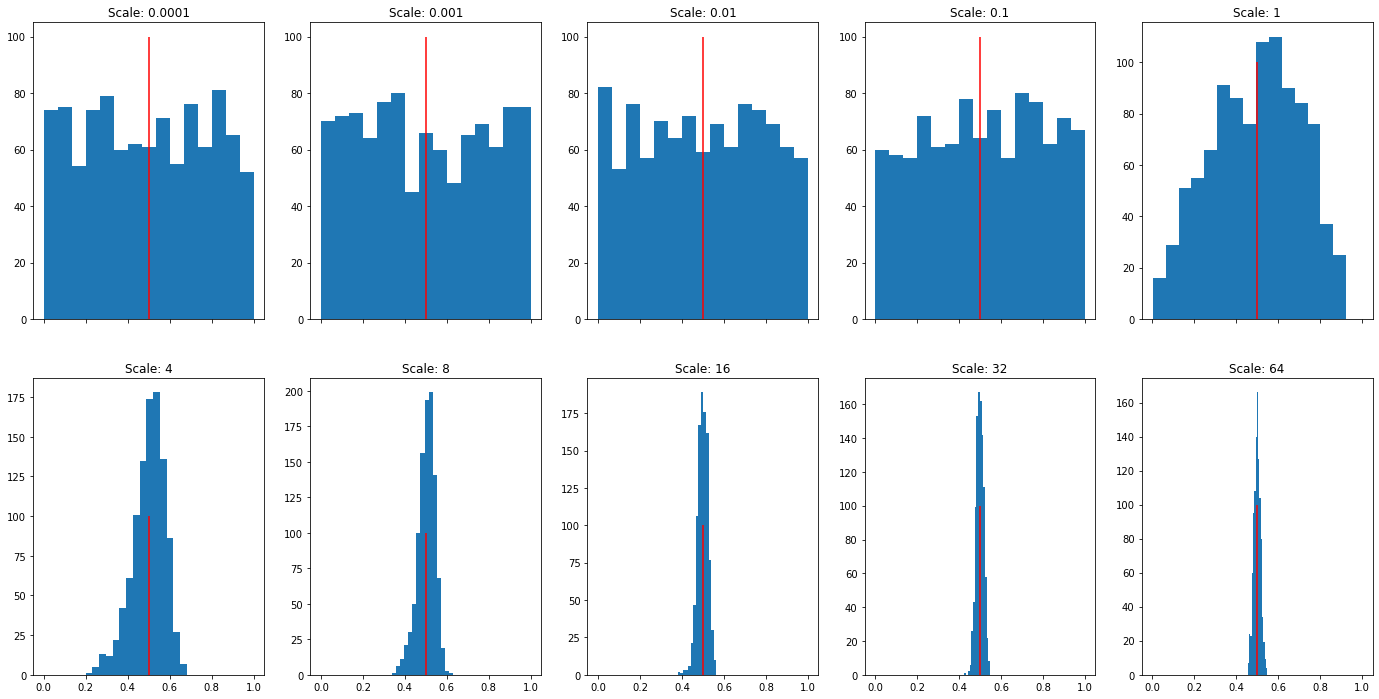

In [34]:
fig, axs = plt.subplots(2, 5, figsize=(24, 12), sharex=True)
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.hist(p_values_scales[i], bins=15);
    ax.set_title(f"Scale: {scales[i]}");
    ax.vlines(0.5, 0, 100, color="red")

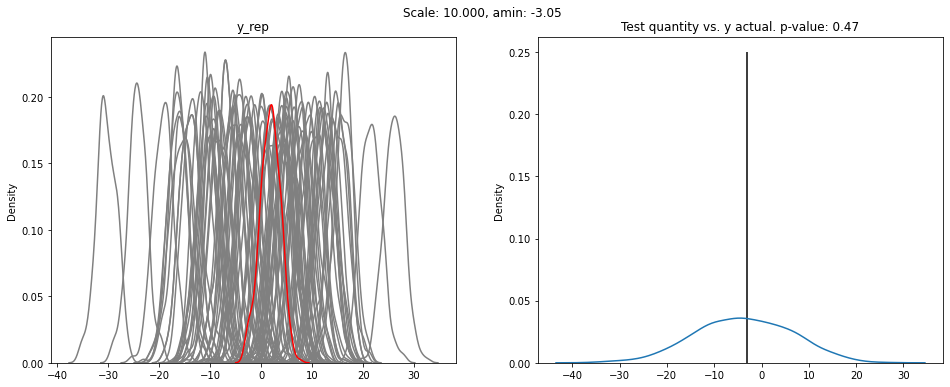

In [96]:
s = 10
y = np.random.normal(loc_true, scale_true, size=n_dataset)
loc_post = np.random.normal(loc_true, scale=s, size=n_simulations)
y_rep = np.random.normal(loc_post, scale_true, size=(n_dataset, n_simulations))

test_quantity = np.min
test_statistic = test_quantity(y_rep, 0)
p_value = np.mean(test_statistic > test_quantity(y))

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
for i in range(100):
    sns.kdeplot(y_rep[:, np.random.randint(n_experiments)], color="grey", ax=ax[0]);
ax[0].set_title("y_rep");
sns.kdeplot(y, color="red", ax=ax[0]);
sns.kdeplot(test_statistic, ax=ax[1]);
ax[1].vlines(test_quantity(y), 0, 0.25);
ax[1].set_title(f"Test quantity vs. y actual. p-value: {p_value:.2f}");
plt.suptitle(f"Scale: {s:.3f}, {test_quantity.__name__}: {test_quantity(y):.2f}", y=0.95);